# Finding Heavy Traffic Indicators on I-94
## Introduction

This project aims at integrating two methods of data visualization:
* Exploratory data visualization - building graphs for ourselves to explore data and find patterns
* Explanatory data visualization - building graphs for others to communicate and explain patterns we've found
The goal of our analysis here is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of day, day of the week, etc. For instance, we may find that the traffic is usually heavier in the summer, or when it snows. The dataset used in this project was made available by John Hogue, and is available __[here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)__.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(i_94.head(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
print(i_94.tail(5))

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [4]:
print(i_94.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


The dataset has 48,204 rows and 9 columns, and no null values. Each row contains traffic and weather data for a specific hour, and the timeframe we have available is from 2012-10-02 at 09:00:00 until 2018-09-30 at 23:00:00

One piece of information to keep in mind, is that the __[documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)__ mentions that the station (approx. midway between Minneapolis and Saint Paul) recorded the data, and it only recorded westbound data. Due to having only one direction of traffic, we should ensure we do not make broad generalizations about the entirety of I-94.

## Analyzing Traffic Volume

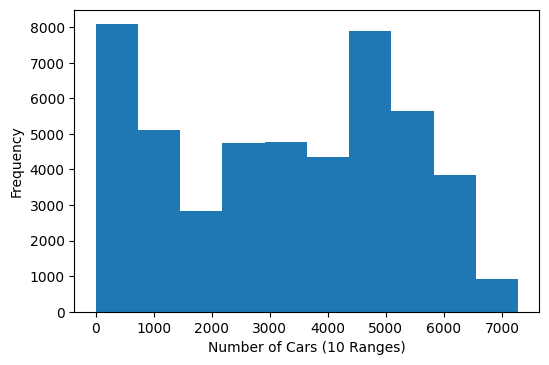

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.xlabel('Number of Cars (10 Ranges)')
plt.show()

In [6]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The description of the `traffic_volume` series shows us that between the earliest and latest recorded dates, hourly traffic volume ranged from = cats to 7,280 cars, with an average of ~3,260 cars. One would assume that the lower percentages of the time (e.g. 25%, with an average of 1,986 cars/hour) would occur during low-volume commute times, such as overnight. We will compare daytime and nighttime data below.

## Traffic Volume: Day vs. Night
We'll begin here by dividing the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [7]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7)
                  & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) 
                    | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


There is a discrepancy between the number of daytime and nighttime entries, due to a few hours of missing data.

## Traffic Volume: Day vs. Night (II)
Now that we've isolated daytime and nighttime data, we'll look at histograms of traffic volume side-by-side using a grid chart.

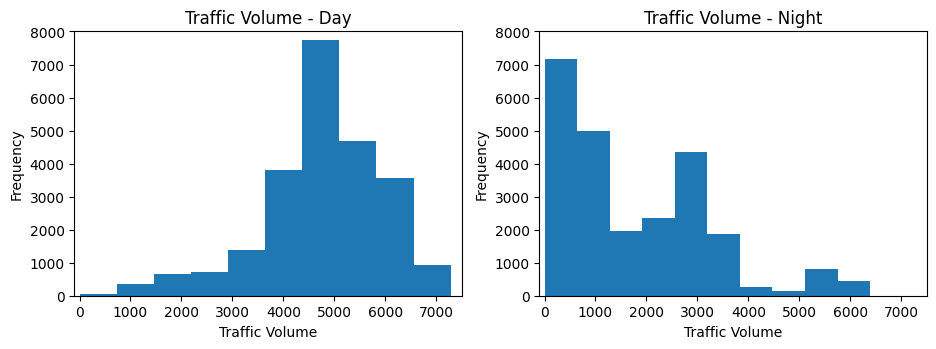

In [8]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume - Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume - Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime traffic is left-skewed, indicating that higher concentrations of traffic occur more frequently, which tracks with common sense. The histogram for nighttime traffic is right-skewed, indicatinf that lower concentrations of traffic occur more frequently, with 0 cars per hour being the most frequent, proving our earlier assumption correct.

The descriptions also support these conclusions, with the average number of cars per hour being 4,762 during daytime, and 1,785 during nighttime.

While there is traffic at night, the numbers are generally lower than what we'd be looking for, since we are looking for indicators of heavy traffic, we will continue with only the daytime data.

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day. We'll look at a few line plots showing how the volume of traffic changed using the following parameters:
* Month
* Day of the week
* Time of day

In [11]:
day['month'] = day['date_time'].dt.month # Creates new month column
by_month = day.groupby('month').mean() #Aggregates data by month
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Below, we will plot this data on a line plot to get a better sense for what these numbers mean:

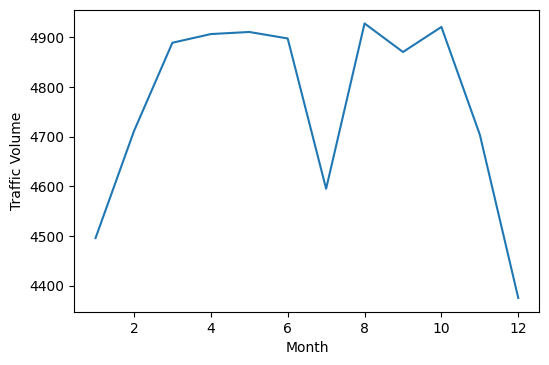

In [12]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

The immediately noticable observation is that the colder months have less traffic, with a sharp dip occurring between October and December, and a less sharp rise occuring between January and March.

There is one rather odd exception to this trent in July, which we will further observe below.

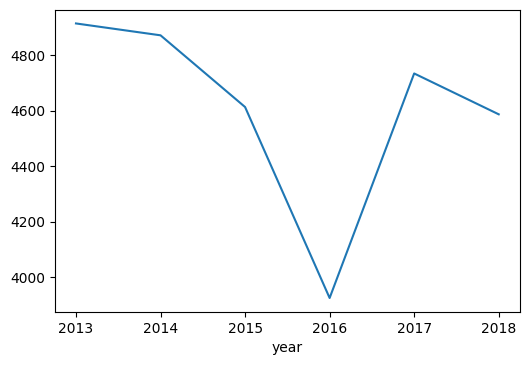

In [13]:
day['year'] = day['date_time'].dt.year #Creates column for year
july_only = day[day['month'] == 7]
by_year = july_only.groupby('year').mean()
by_year['traffic_volume'].plot.line()
plt.show()

This data shows us that the dip in July's average is primarily due to unusually low traffic in the year 2016, which, according to __[this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)__, could have been caused by road construction.

If we remove the data from 2016, we can observe whether the dip in July is in fact due to this year alone:

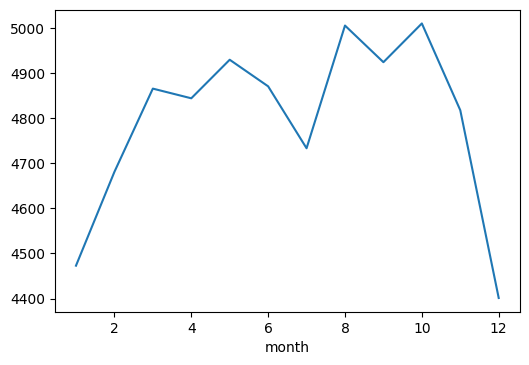

In [14]:
no_2016 = day[day['year'] != 2016]
by_month_no_2016 = no_2016.groupby('month').mean()
by_month_no_2016['traffic_volume'].plot.line()
plt.show()

As expected, the line plot looks more normal, although still with a small dip in July, but the broader conclusion that warmer months lead to more traffic is indeed intact.

## Time Indicators (II)
Now that we've analyzed traffic by month, let's get more specific an analyze by day of the week.

In [15]:
day['dayofweek'] = day['date_time'].dt.dayofweek #Creates new dayofweek column
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] #0=Monday, 6=Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Now let's make a line plot with the above data to get a better sense of what it describes.

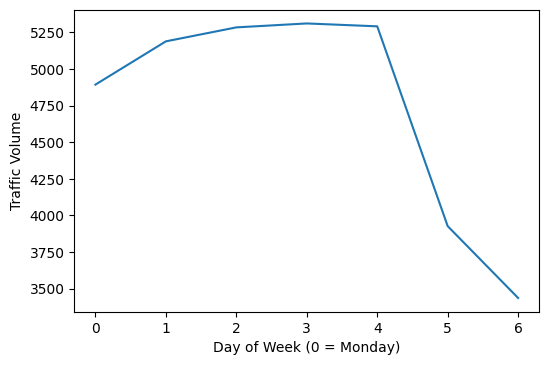

In [16]:
by_dayofweek['traffic_volume'].plot.line()
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Traffic Volume')
plt.show()

Upon first glance, there is an immediately noticable decline in traffic on days 5 and 6, with 6 being the lowest. This confirms the common sense hypothesis that weekends will be days of less traffic, on average. Monday, being the only weekday with less than 5,000 cars on average, is probably slightly reduced due to the number of long weekend holidays in which many people do not work on Monday.

## Time Indicators (III)
Now that we've looked at month and day of the week, we will look at time of day. Since weekends have lower traffic on average, we will separate them into their own category.

In [17]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

Now that the days have been separated, we will create a line plot for each group by hour.

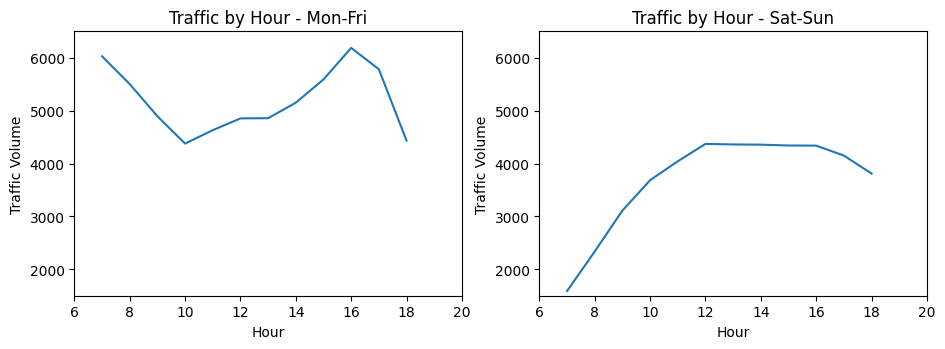

In [18]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic by Hour - Mon-Fri')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic by Hour - Sat-Sun')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.show()

There is almost an M shape to the traffic data for weekdays, which makes sense given weekdays will have two rush hours (0700 and 1600), while weekends have a slow ramp up and down over the course of the day, with the peak of weekend traffic corresponding to the lull of weekend traffic.

The three time-related traffic factors found in these three analyses are:
* Warmer months lead to increased traffic
* Weekdays lead to increased traffic
* Rush hours during weekdays lead to increased traffic

## Weather Indicators
Now that we've gleaned the information available from time indicators, we'll transition to another indicator, weather. The dataset provides us with the columns `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, and `weather_description`.

The latter two columns are objects, strings specifically, but the first four columns are numerical, so we can find correlation values between them and traffic volume.

In [19]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The highest correlation between a weather column and traffic volume is temp, with a positive correlation of 0.128317, we will create a scatter plot with this column below.

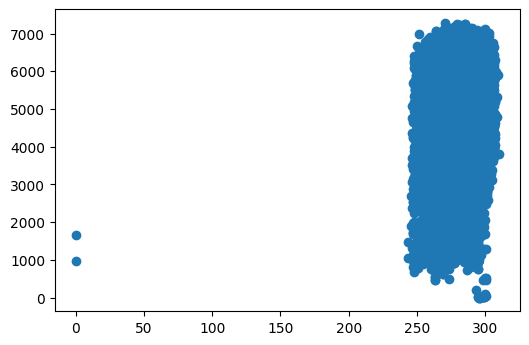

In [20]:
plt.scatter(day['temp'],day['traffic_volume'])

Since the dataset documentation tells us the temperature is recorded in Kelvin, the two 0's are impossible according to the laws of physics, and therefore we should try restricting the x axis to get a better look at the data.

(240.0, 315.0)

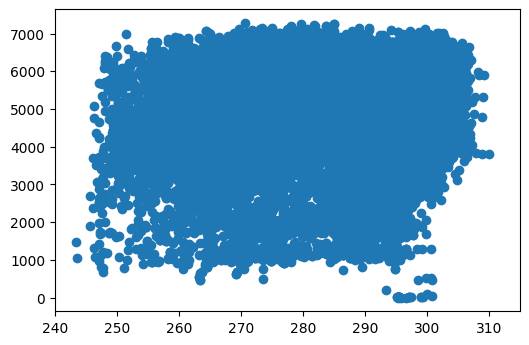

In [21]:
plt.scatter(day['temp'],day['traffic_volume'])
plt.xlim(240,315)

While being the highest-correlated numerical column, temperature doesn't seem like the most reliable indicator for heavy traffic, and any correlation that exists can likely be explained by warmer weather during the summer months, when traffic tends to be higher as we already have shown.

## Weather Types
To see if we can find more useful data, we'll look at the categorical weather-related columns `weather_main` and `weather_description`.

We'll calculate the average traffic volume associated with each unique value in these column.

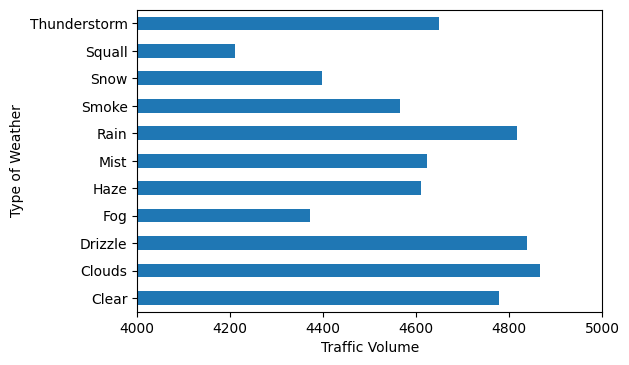

In [22]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Type of Weather', rotation=90)
plt.xlim(4000,5000)
plt.show()

None of the weather types in our set indicate a particularly high traffic volume, with none reaching 5,000. If anything, there are some types of weather that indicate a reduction in traffic volume. Let's try `weather_description` next, as it is more granular.

(2000.0, 6000.0)

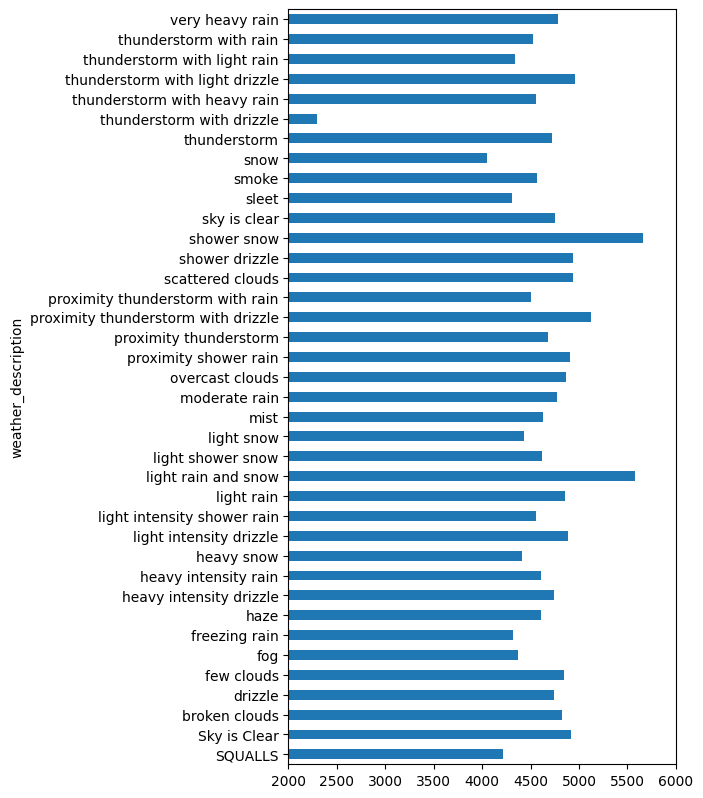

In [35]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.xlim(2000,6000)

It appears that there are in fact three weather descriptions with traffic volumes over 5000:
* Shower snow
* Proximity thunderstorm with drizzle
* Light rain and snow
The most obvious reasoning for this would be that these conditions are bad enough to make walking or biking less desirable, but not bad enough to warrant a significant volume of people staying home.

## Conclusions
During this project we found two types of indicators which had potential to influence traffic volume significantly, each with specific indicators:
* Time indicators
    * Heavier traffic during:
        * Warm months
        * Weekdays
        * Rush hour times (0700 and 1600)
* Weather indicators
    * Heavier traffic dur